In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [51]:
co2 = pd.read_csv('co2_emissions_kt_by_country.csv')
co2

country_code country_name  year         value
0              ABW        Aruba  1960  11092.675000
1              ABW        Aruba  1961  11576.719000
2              ABW        Aruba  1962  12713.489000
3              ABW        Aruba  1963  12178.107000
4              ABW        Aruba  1964  11840.743000
...            ...          ...   ...           ...
13948          ZWE     Zimbabwe  2015  12430.000305
13949          ZWE     Zimbabwe  2016  11020.000458
13950          ZWE     Zimbabwe  2017  10340.000153
13951          ZWE     Zimbabwe  2018  12380.000114
13952          ZWE     Zimbabwe  2019  11760.000229

[13953 rows x 4 columns]

In [2]:
# This data set containing GDP,GDP/CAPITA,Renewable energy and co2 emmision
data = pd.read_csv('co2_file.csv')

In [3]:
co2.describe()

NameError: name 'co2' is not defined

In [ ]:
co2.info()

In [4]:
co2.groupby('country_name')['value'].sum().reset_index().set_index('country_name').sort_values('value',ascending= False).head(10)

NameError: name 'co2' is not defined

In [5]:
co2.groupby('country_name')['value'].max().sort_values(ascending=False).head(20)

NameError: name 'co2' is not defined

# Data Cleaning

We can see this data set contain country name, redion, income_type, IDA, IBRD and other combinetions we need to segrigate so that we can have data sets only contains countries, regions, income type and others

In [6]:
data = data.fillna(0)

## Region

In [8]:
asia = data[data['country'].str.contains('Asia')]['country'].unique()
caribbean = data[data['country'].str.contains('Caribbean')]['country'].unique()
africa = data[data['country'].str.contains('Africa')]['country'].unique()
africa = africa[africa != 'South Africa']
europe = data[data['country'].str.contains('Euro')]['country'].unique()
North_America = data[data['country'].str.contains('North America')]['country'].unique()

## Demographic

In [10]:
demographic = data[data['country'].str.contains('demo')]['country'].unique()

## Income

In [11]:
income = data[data['country'].str.contains('income')]['country'].unique()
ida = data[data['country'].str.contains('IDA')]['country'].unique()
ibrd = data[data['country'].str.contains('IBRD')]['country'].unique()

In [13]:
other_regions = ['World', 'Europe', 'South Asia', 'OECD members', 'Euro area', 'Arab World', 'Heavily indebted poor countries (HIPC)','Small states','Other small states' , 'Fragile and conflict affected situations', 'Least developed countries: UN classification', 'Pacific island small states']
groups = np.concatenate((asia, europe, caribbean, africa, demographic, ida, ibrd,income, other_regions))
co2_countries= data.query("country not in @groups").copy()

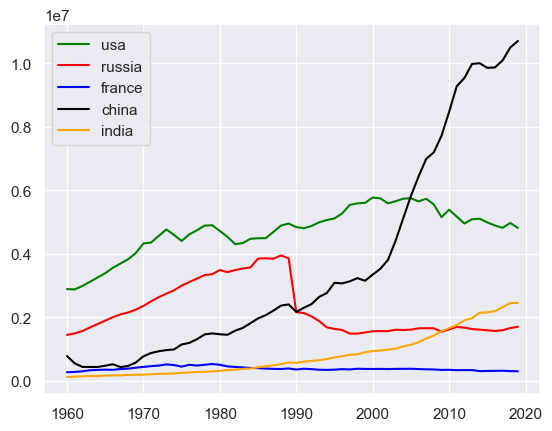

In [15]:
usa = co2_countries[co2_countries['country']=='United States']
russia = co2_countries[co2_countries['country']=='Russian Federation']
france = co2_countries[co2_countries['country']=='France']
china = co2_countries[co2_countries['country']=='China']
india = co2_countries[co2_countries['country']== 'India']
plt.plot(usa.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'green',label = 'usa')
plt.plot(russia.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'red',label = 'russia')
plt.plot(france.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'blue',label = 'france')
plt.plot(china.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'black',label = 'china')
plt.plot(india.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'orange',label = 'india')
plt.legend(loc = 'best')

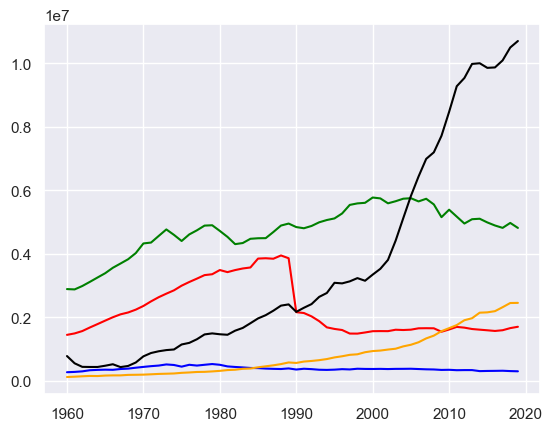

In [16]:
usa = co2_countries[co2_countries['country']=='United States']
russia = co2_countries[co2_countries['country']=='Russian Federation']
france = co2_countries[co2_countries['country']=='France']
china = co2_countries[co2_countries['country']=='China']
india = co2_countries[co2_countries['country']== 'India']
plt.plot(usa.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'green',label = 'usa')
plt.plot(russia.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'red',label = 'russia')
plt.plot(france.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'blue',label = 'france')
plt.plot(china.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'black',label = 'china')
plt.plot(india.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'orange',label = 'india')

In [18]:
co2_countries.to_csv('co2_countries.csv')

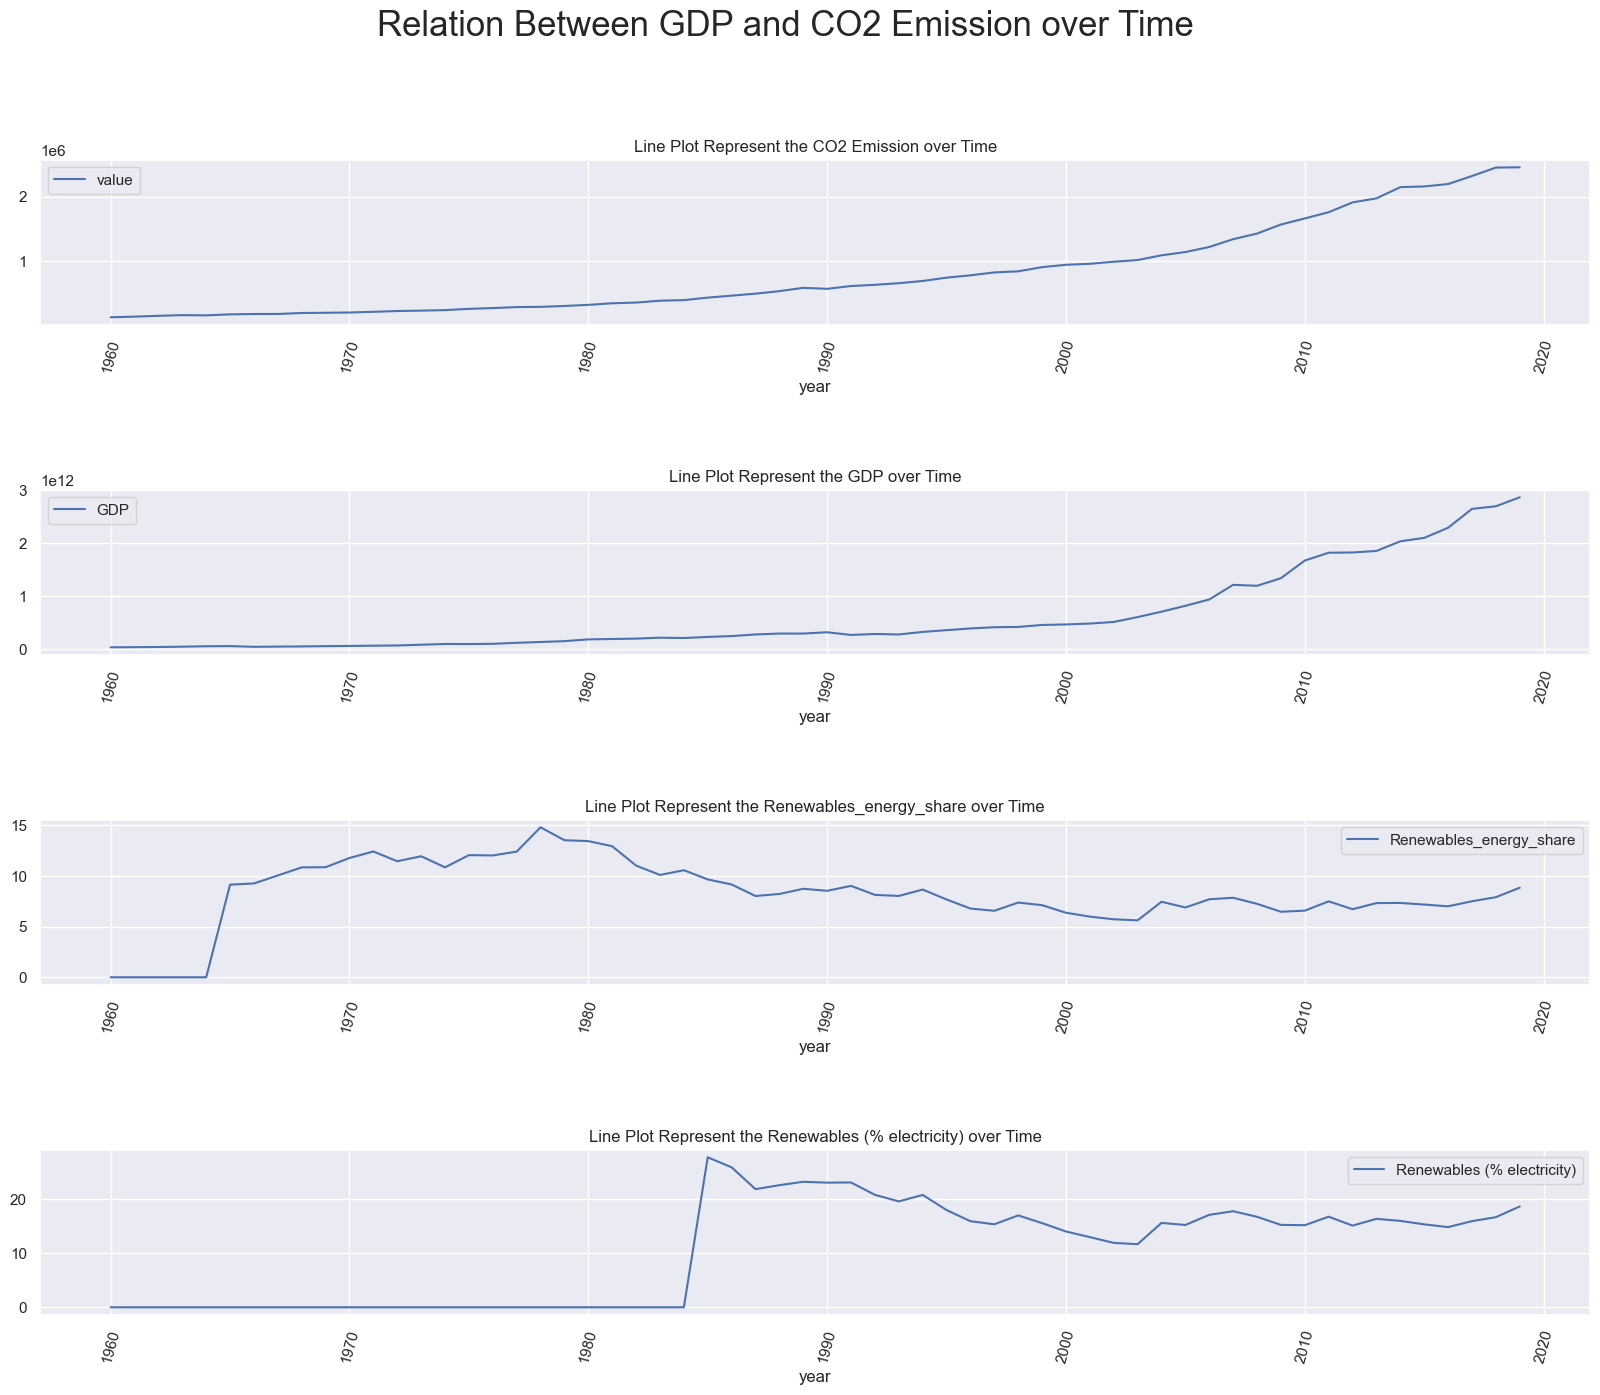

In [85]:
country = data[data['country'] == 'India']
figure, ax = plt.subplots(4,1,figsize = (20,15))
plt.subplots_adjust(hspace=1)
sns.lineplot(country.groupby('year')['value'].sum().reset_index().set_index('year'),ax = ax[0])
ax[0].tick_params('x', labelrotation=75)
sns.lineplot(country.groupby('year')['GDP'].sum().reset_index().set_index('year'),ax = ax[1])
ax[1].tick_params('x', labelrotation=75)
sns.lineplot(country.groupby('year')['Renewables_energy_share'].sum().reset_index().set_index('year'),ax = ax[2])
ax[2].tick_params('x', labelrotation=75)
sns.lineplot(country.groupby('year')['Renewables (% electricity)'].sum().reset_index().set_index('year'),ax = ax[3])
ax[3].tick_params('x', labelrotation=75)
figure.suptitle('Relation Between GDP and CO2 Emission over Time ', fontsize=25)
ax[0].title.set_text('Line Plot Represent the CO2 Emission over Time')
ax[1].title.set_text('Line Plot Represent the GDP over Time')
ax[2].title.set_text('Line Plot Represent the Renewables_energy_share over Time')
ax[3].title.set_text('Line Plot Represent the Renewables (% electricity) over Time')
plt.show()



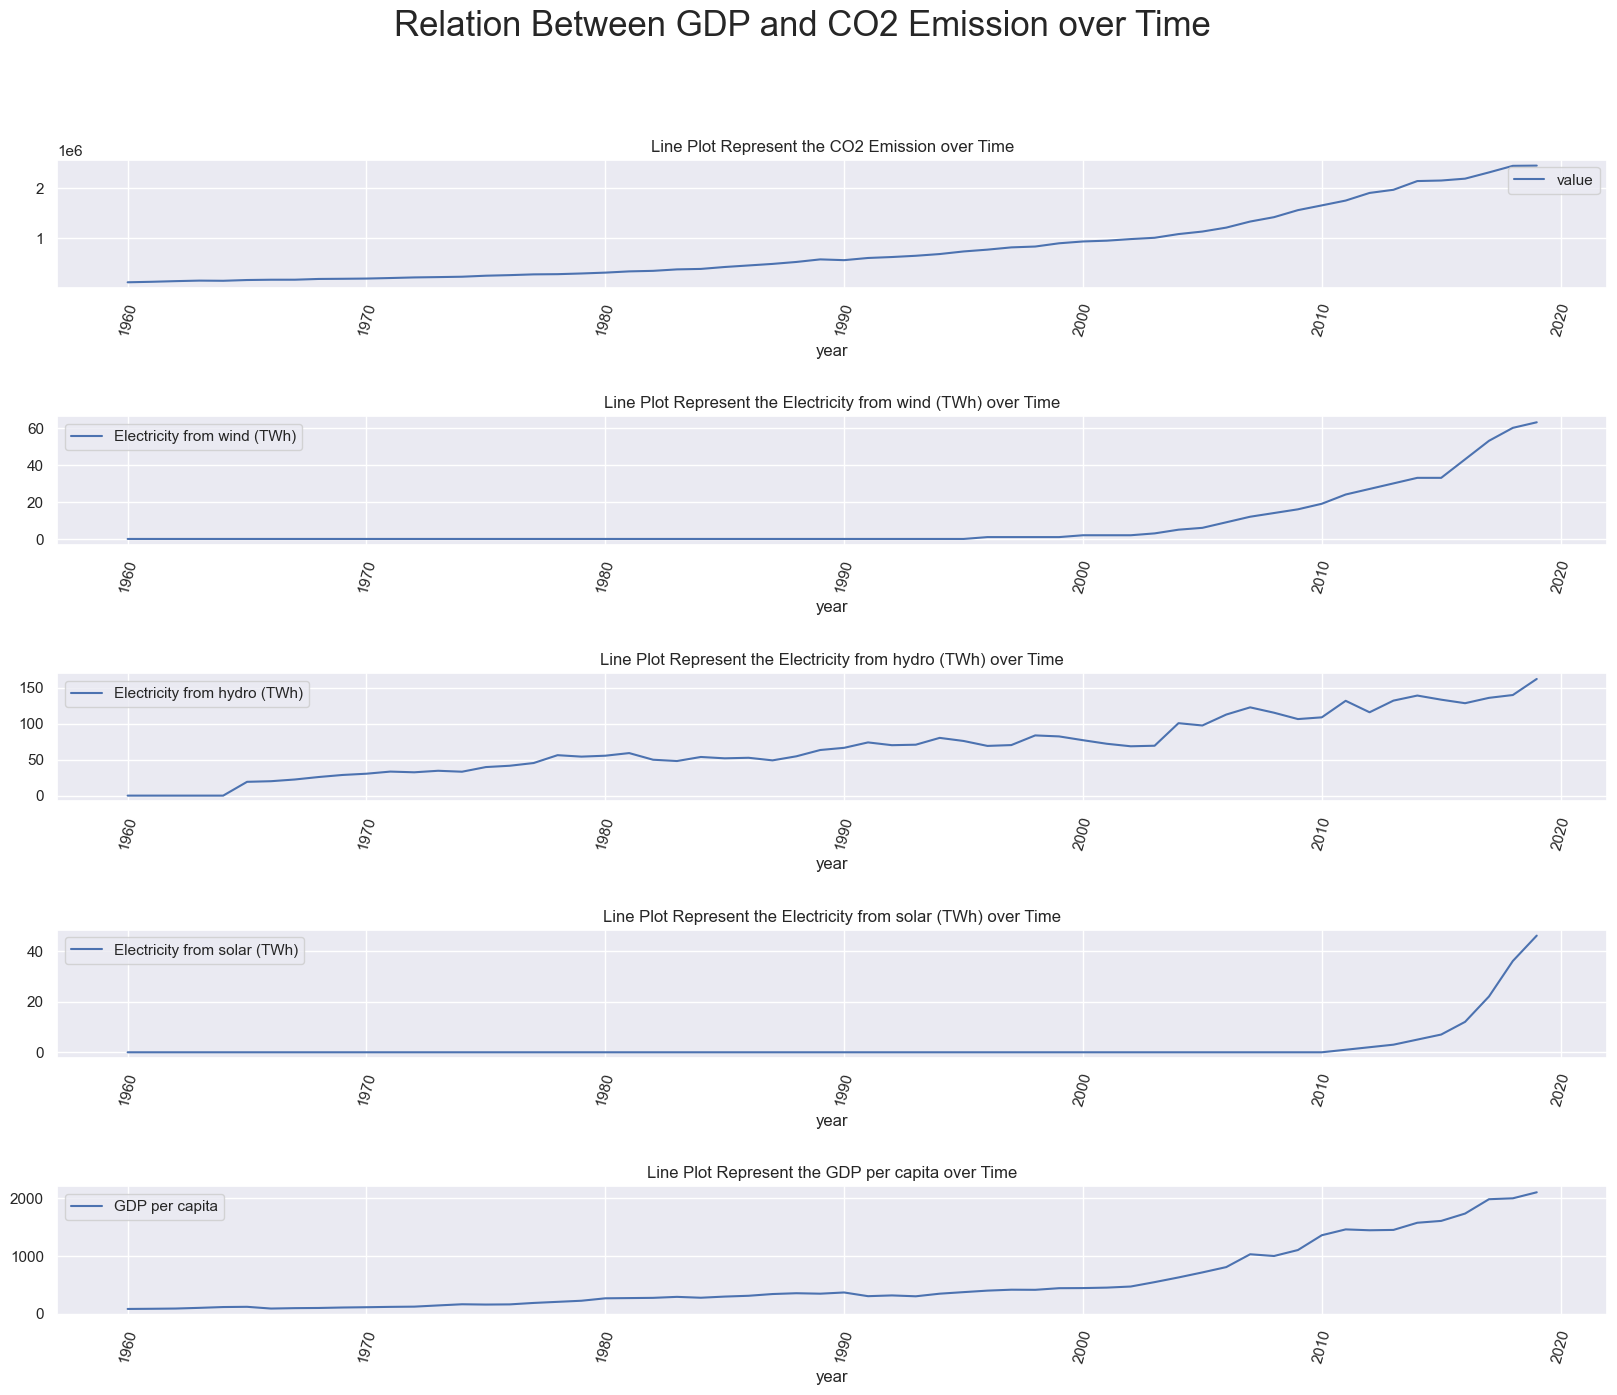

In [87]:
country = data[data['country'] == 'India']
figure, ax = plt.subplots(5,1,figsize = (20,15))
plt.subplots_adjust(hspace=1)
sns.lineplot(country.groupby('year')['value'].sum().reset_index().set_index('year'),ax = ax[0])
ax[0].tick_params('x', labelrotation=75)
sns.lineplot(country.groupby('year')['Electricity from wind (TWh)'].sum().reset_index().set_index('year'),ax = ax[1])
ax[1].tick_params('x', labelrotation=75)
sns.lineplot(country.groupby('year')['Electricity from hydro (TWh)'].sum().reset_index().set_index('year'),ax = ax[2])
ax[2].tick_params('x', labelrotation=75)
sns.lineplot(country.groupby('year')['Electricity from solar (TWh)'].sum().reset_index().set_index('year'),ax = ax[3])
ax[3].tick_params('x', labelrotation=75)
sns.lineplot(country.groupby('year')['GDP per capita'].sum().reset_index().set_index('year'),ax = ax[4])
ax[4].tick_params('x', labelrotation=75)
figure.suptitle('Relation Between GDP and CO2 Emission over Time ', fontsize=25)
ax[0].title.set_text('Line Plot Represent the CO2 Emission over Time')
ax[1].title.set_text('Line Plot Represent the Electricity from wind (TWh) over Time')
ax[2].title.set_text('Line Plot Represent the Electricity from hydro (TWh) over Time')
ax[3].title.set_text('Line Plot Represent the Electricity from solar (TWh) over Time')
ax[4].title.set_text('Line Plot Represent the GDP per capita over Time')
plt.show()

<AxesSubplot: xlabel='country_name', ylabel='value'>

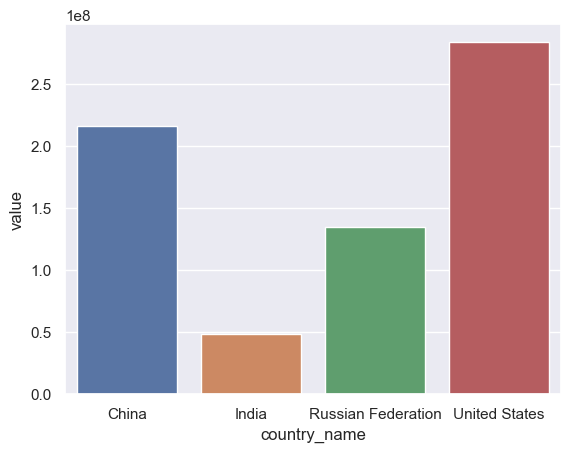

In [12]:
data = co2_countries.groupby('country_name')['value'].sum().reset_index()
sns.barplot(data= data[data['country_name'].isin(['United States', 'China', 'Russian Federation','India'])],x= 'country_name',y='value')

In [13]:
import plotly.express as px
fig = px.choropleth(co2_countries, locations='country_code',
                    animation_frame='year', animation_group='country_name',
                    color='value', 
                    hover_name='country_name',
                    hover_data=['year', 'country_name', 'value'],
                    color_continuous_scale=px.colors.sequential.dense)
fig.show()

In [14]:
co2_country = co2_countries.groupby('country_name')['value'].sum().reset_index()
top_10 = co2_countries.groupby('country_name')['value'].sum().reset_index().sort_values('value',ascending = False).head(10)
top_10_name = top_10['country_name'].tolist()
top_10_emmiters= co2_countries.query("country_name in @top_10_name").copy()
top_10_emmiters

country_code   country_name  year         value
1860           CAN         Canada  1960  1.928952e+05
1861           CAN         Canada  1961  1.941823e+05
1862           CAN         Canada  1962  2.071855e+05
1863           CAN         Canada  1963  2.111092e+05
1864           CAN         Canada  1964  2.378013e+05
...            ...            ...   ...           ...
13264          USA  United States  2015  4.990710e+06
13265          USA  United States  2016  4.894500e+06
13266          USA  United States  2017  4.819370e+06
13267          USA  United States  2018  4.975310e+06
13268          USA  United States  2019  4.817720e+06

[570 rows x 4 columns]

In [15]:
px.area(top_10_emmiters, x='year', y='value', line_group='country_name', color='country_name',
                   category_orders={
                    "country_name": top_10_name 
            },
                labels={
                     "value": "CO2 Emissions",
                     "year": "Year",
                     "country_name": "Country"
                 },
              title = 'Annual CO2 Emissions, by Country',
       template="simple_white")

# ARIMA Model

In [16]:
data = co2_countries.groupby('year')['value'].sum()

In [17]:
co2_yoy = data.reset_index().set_index('year')

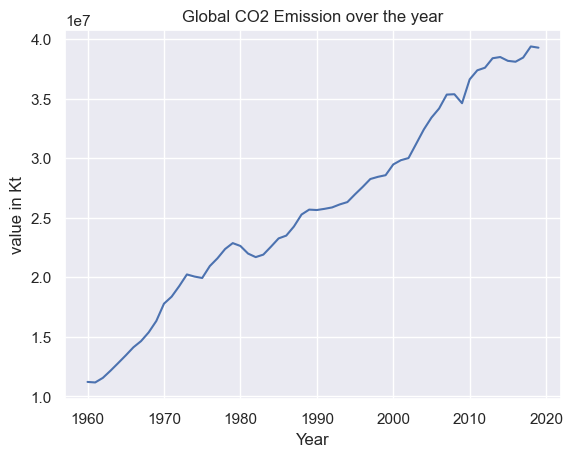

In [18]:
plt.title('Global CO2 Emission over the year')
plt.xlabel('Year')
plt.ylabel('value in Kt')
plt.plot(co2_yoy)

## Determine the rolling statistics

In [19]:
rolling_mean_co2_yoy = co2_yoy.rolling(window=2).mean()
rolling_std_co2_yoy = co2_yoy.rolling(window=2).std()

<AxesSubplot: xlabel='year'>

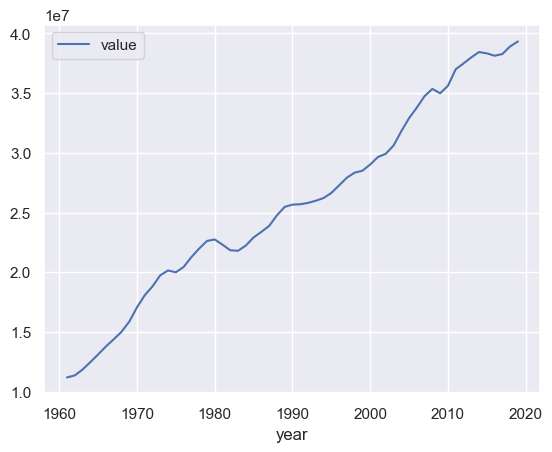

In [20]:
rolling_mean_co2_yoy.plot()

<AxesSubplot: xlabel='year'>

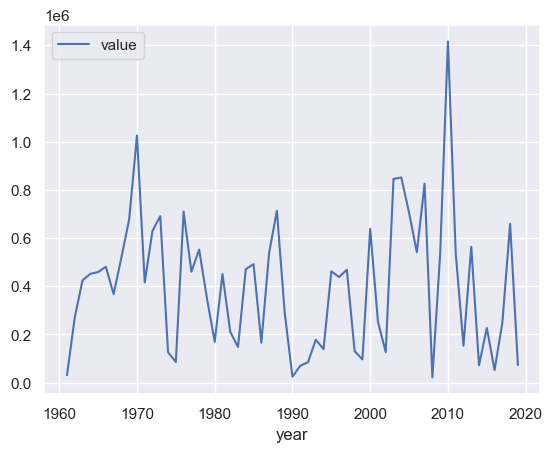

In [21]:
rolling_std_co2_yoy.plot()

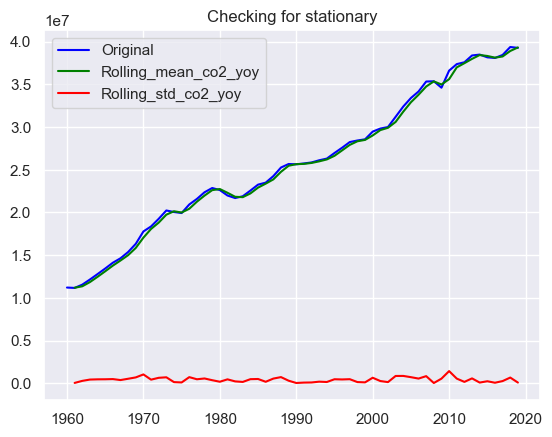

In [22]:
original = plt.plot(co2_yoy, color = 'blue', label = 'Original')
rolling_mean_plot = plt.plot(rolling_mean_co2_yoy, color = 'green', label = 'Rolling_mean_co2_yoy')
rolling_std_plot = plt.plot(rolling_std_co2_yoy, color = 'red', label = 'Rolling_std_co2_yoy')
plt.title('Checking for stationary')
plt.legend(loc = 'best')

## Estimate the trend

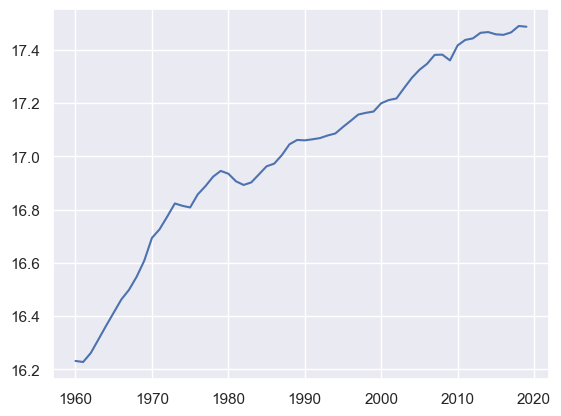

In [23]:
co2_yoy_log = np.log(co2_yoy)
plt.plot(co2_yoy_log)

## Determine the rolling statistics for log form

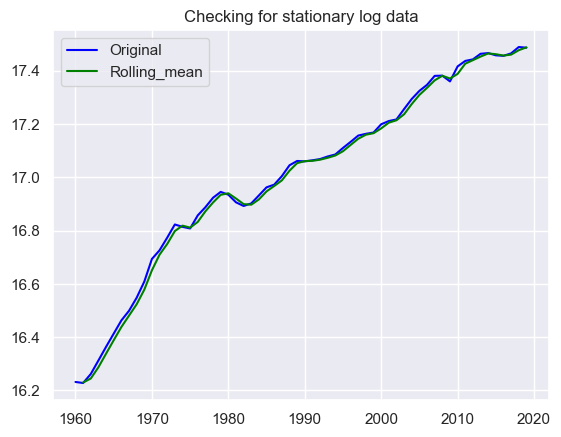

In [24]:
rolling_mean_co2_yoy_log = co2_yoy_log.rolling(window=2).mean()
rolling_std_co2_yoy_log = co2_yoy_log.rolling(window=2).std()
original = plt.plot(co2_yoy_log, color = 'blue', label = 'Original')
rolling_mean_plot_log = plt.plot(rolling_mean_co2_yoy_log, color = 'green', label = 'Rolling_mean')
#rolling_std_plot_log = plt.plot(rolling_std_log, color = 'red', label = 'Rolling_std')
plt.title('Checking for stationary log data')
plt.legend(loc = 'best')

<AxesSubplot: xlabel='year'>

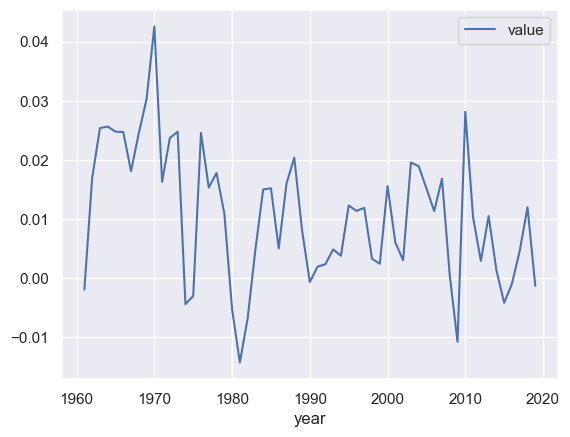

In [25]:
co2_yoy_log_moving_average = co2_yoy_log - rolling_mean_co2_yoy_log
co2_yoy_log_moving_average = co2_yoy_log_moving_average.dropna()
co2_yoy_log_moving_average.plot()

In [26]:
from statsmodels.tsa.stattools import adfuller
def Stationary_Test(data):
    data = data.groupby('year')['value'].sum().reset_index().set_index('year')
    Moving_Average = data.rolling(window=2).mean()
    Moving_STD = data.rolling(window=2).std()
    original = plt.plot(data, color = 'blue', label = 'Original')
    Moving_Average_Plot = plt.plot(Moving_Average, color = 'green', label = 'Rolling_mean')
    Moving_STD_plot = plt.plot(Moving_STD, color = 'red', label = 'Rolling_std')
    plt.title('Checking for stationary log data')
    plt.legend(loc = 'best')
    from statsmodels.tsa.stattools import adfuller
    test = adfuller(data['value'], autolag= 'AIC')
    OUTPUT = pd.Series(test[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
        OUTPUT['Critical Value (%s)'%key] = value
    print(OUTPUT)

Test Statistic                 -2.997976
p-value                         0.035084
#Lags Used                      3.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


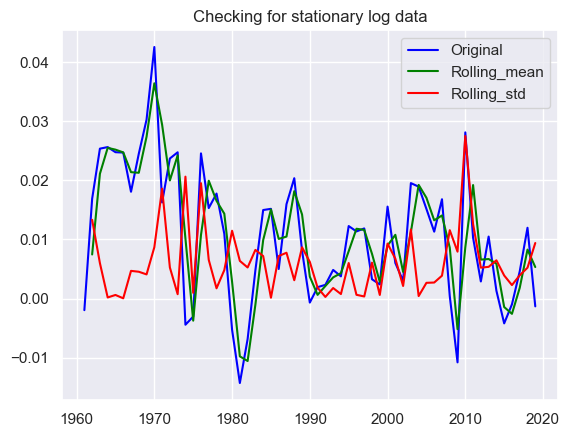

In [27]:
Stationary_Test(co2_yoy_log_moving_average)

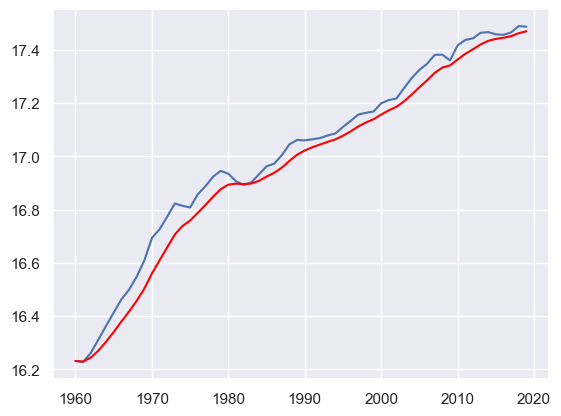

In [28]:
weighted_average = co2_yoy_log.ewm(halflife=2,min_periods=0,adjust=True).mean()
plt.plot(co2_yoy_log)
plt.plot(weighted_average,color = 'red')

Test Statistic                 -1.780291
p-value                         0.390289
#Lags Used                      4.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


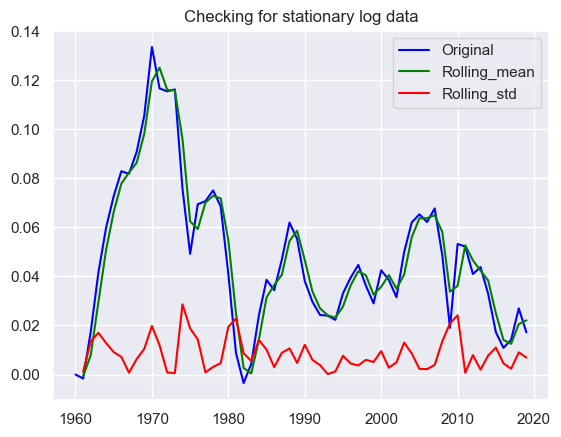

In [29]:
co2_yoy_log_minus_weighted_average = co2_yoy_log-weighted_average
Stationary_Test(co2_yoy_log_minus_weighted_average)

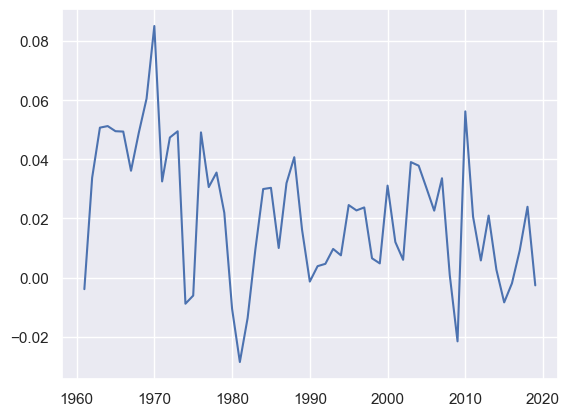

In [30]:
datasetlogdiffshifting = co2_yoy_log - co2_yoy_log.shift()
plt.plot(datasetlogdiffshifting)

Test Statistic                 -2.997976
p-value                         0.035084
#Lags Used                      3.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


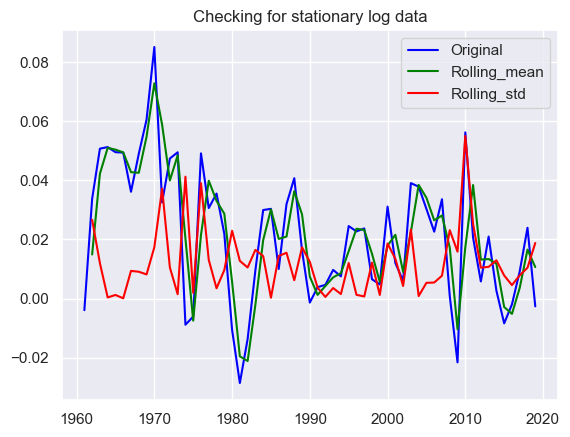

In [31]:
co2_yoy_log_logdiffshifting = datasetlogdiffshifting.dropna()
Stationary_Test(co2_yoy_log_logdiffshifting)

In [32]:
from statsmodels.tsa.stattools import acf, pacf
def autocorrelation(data):
    data = data.groupby('year')['value'].sum().reset_index().set_index('year')
    lag_acf = acf(data, nlags=25)
    lag_pacf = pacf(data, nlags=25, method='ols')
    # Plot ACF
    plt.subplot(121)
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle = '--',color = 'red')
    plt.axhline(y = -1.96/np.sqrt(len(data)),linestyle = '--', color = 'gray')
    plt.axhline(y = 1.96/np.sqrt(len(data)),linestyle = '--', color = 'gray')
    plt.title('Autocorrelation Function')
    # Plot PACF
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle = '--',color = 'red')
    plt.axhline(y = -1.96/np.sqrt(len(data)),linestyle = '--', color = 'gray')
    plt.axhline(y = 1.96/np.sqrt(len(data)),linestyle = '--', color = 'gray')
    plt.title('Partial Autocorrelation Function')

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

## ARIMA model

In [34]:
from statsmodels.tsa.arima.model import ARIMA
def arima_model(data, p, d, q):
    x = data['value'].values
    size = int(len(x)*0.9)
    train = x[0:size]
    test = x[size:len(x)]
    training_data = [x for x in train]
    model_prediction=[]
    
    for x in range(len(test)):
        model = ARIMA(training_data, order=(p, d, q))
        fitted_model = model.fit()
        yhat = fitted_model.forecast()
        model_prediction.append(yhat[0])
        observetion = test[x]
        training_data.append(observetion)
        print(f'predicted={yhat[0]}, expected={observetion}')
    
    rmse = sqrt(mean_squared_error(test, model_prediction))
    print(f'\nThe RMSE for this ARIMA model is {rmse}')
    print()
    
    print(fitted_model.summary())
    
    residuals = pd.DataFrame(fitted_model.resid)
    residuals.plot()
    plt.show()
    
    residuals.plot(kind='kde')
    plt.show()

In [35]:
def forecast(data, p, d, q, t):
    value = data['value'].values
    year  = data['year'].values
    historIcal_value = value.tolist()
    period = year.tolist()
    forcasted_values = []
    forcasted_period = []
    for x in range(t):
        forcasted_period.append(2020+x)
        model = ARIMA(historIcal_value, order=(p, d, q))
        fitted_model = model.fit()
        yhat = fitted_model.forecast()
        forcasted_values.append(yhat[0])
        historIcal_value.append(yhat[0])
        plt.figure(figsize=(10, 5))
    plt.plot(period, value, label='CO2 Emission upto 2019')
    plt.plot(forcasted_period, forcasted_values, label='CO2 Emission forcasted 2019')
    plt.legend()
    plt.show()

In [36]:
data = co2.loc[co2['country_name']=='China']

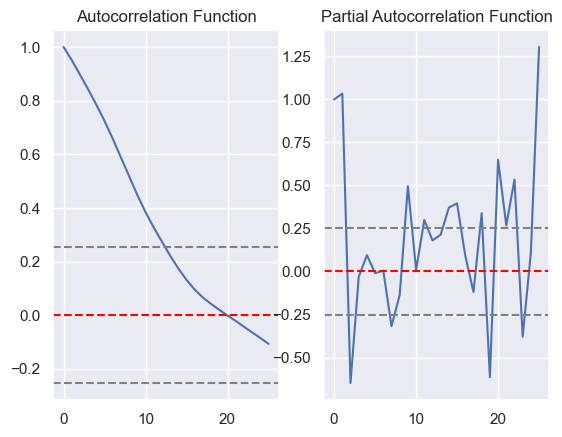

In [37]:
autocorrelation(data)

C:\Users\ABHIJIT\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



predicted=10287921.41241492, expected=10006669.921875
predicted=10267362.133541182, expected=9861099.609375
predicted=9998338.066604573, expected=9874660.15625
predicted=10035480.82383183, expected=10096009.765625
predicted=10117874.462729134, expected=10502929.6875
predicted=10843614.87572151, expected=10707219.7265625

The RMSE for this ARIMA model is 267700.9465225857

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   59
Model:                ARIMA(10, 1, 1)   Log Likelihood                -787.106
Date:                Sun, 16 Apr 2023   AIC                           1598.211
Time:                        17:14:25   BIC                           1622.937
Sample:                             0   HQIC                          1607.842
                                 - 59                                         
Covariance Type:                  opg                                   

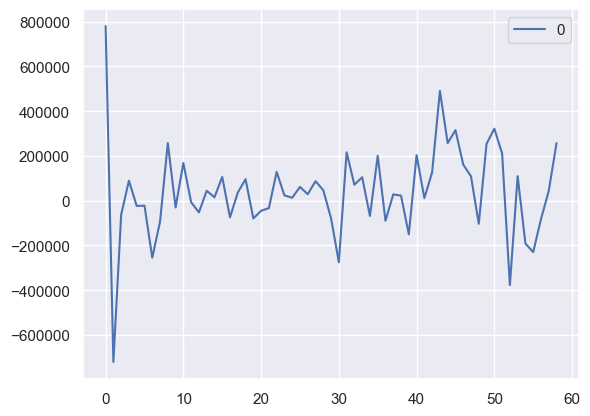

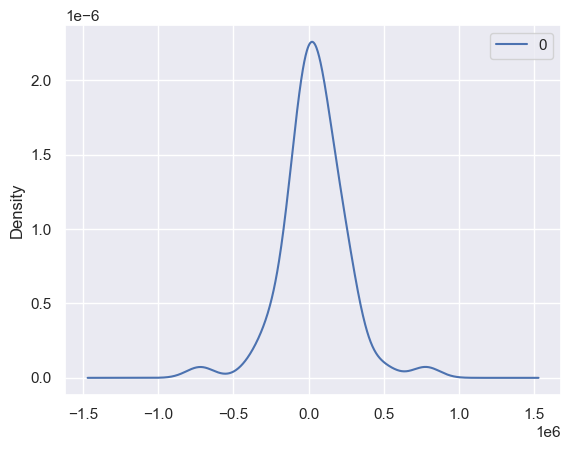

In [38]:
arima_model(data, 10, 1, 1)

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

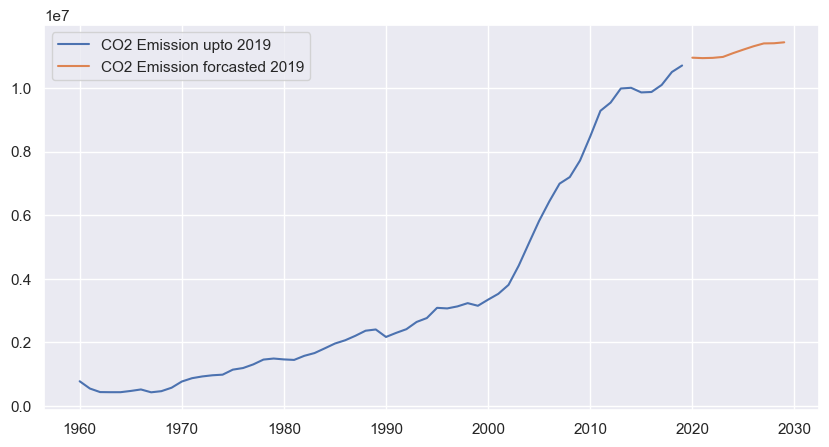

In [39]:
forecast(data, 10, 1, 1, 10)

In [40]:
data = co2.loc[co2['country_name']=='India']

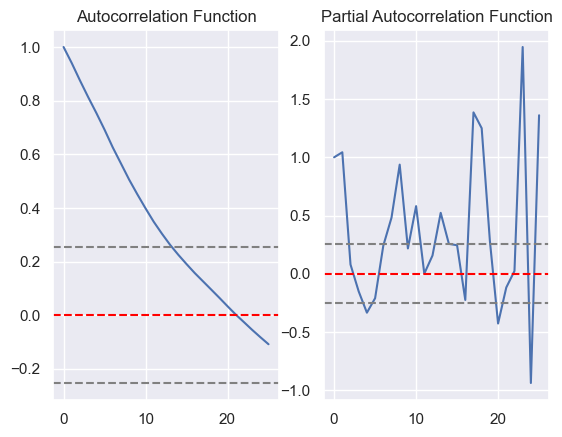

In [41]:
autocorrelation(data)

C:\Users\ABHIJIT\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



predicted=2076291.9544427516, expected=2147110.10742188
predicted=2252723.3491498637, expected=2158020.01953125
predicted=2293128.053752815, expected=2195250.0
predicted=2241462.2776643033, expected=2320409.91210938
predicted=2317858.364276687, expected=2451929.93164063
predicted=2570149.022452972, expected=2456300.04882813

The RMSE for this ARIMA model is 100609.43278672041

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   59
Model:                ARIMA(10, 1, 1)   Log Likelihood                -680.440
Date:                Sun, 16 Apr 2023   AIC                           1384.881
Time:                        17:14:30   BIC                           1409.606
Sample:                             0   HQIC                          1394.512
                                 - 59                                         
Covariance Type:                  opg                              

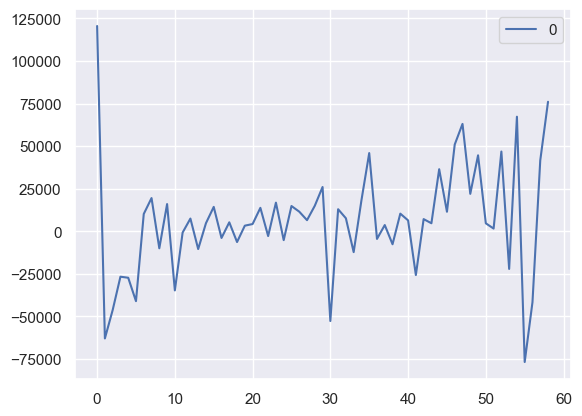

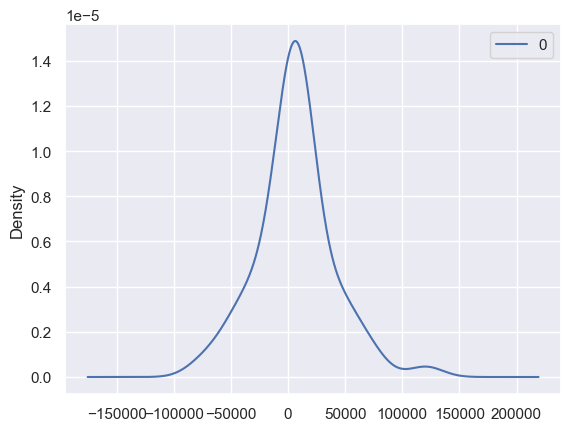

In [42]:
arima_model(data, 10, 1, 1)

C:\Users\ABHIJIT\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

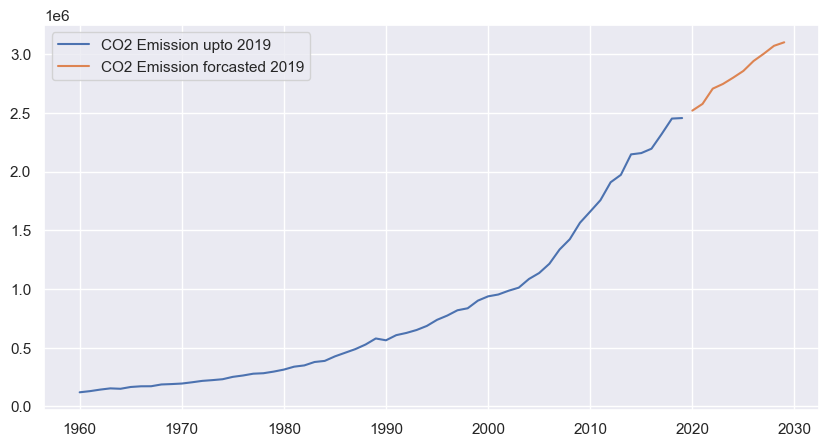

In [43]:
forecast(data, 10, 1, 1, 10)

In [44]:
data = co2.loc[co2['country_name']=='Russian Federation']

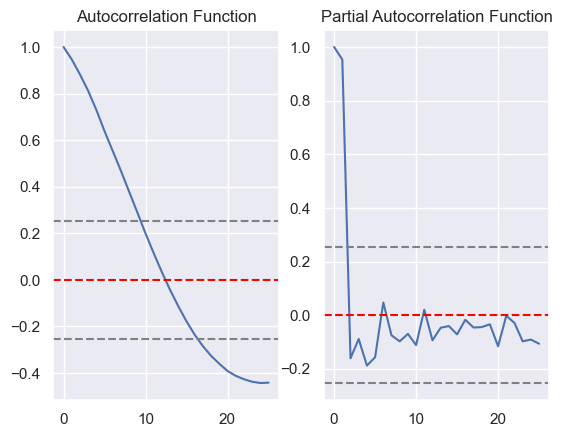

In [45]:
autocorrelation(data)

predicted=1646215.037234068, expected=1611959.9609375
predicted=1610442.2162064088, expected=1592560.05859375
predicted=1583749.8463598373, expected=1571520.01953125
predicted=1564898.3142325117, expected=1594550.04882813
predicted=1592118.9225913612, expected=1661000.0
predicted=1662054.39233646, expected=1703589.96582031

The RMSE for this ARIMA model is 38712.14824694581

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   59
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -799.390
Date:                Sun, 16 Apr 2023   AIC                           1614.780
Time:                        17:14:34   BIC                           1631.263
Sample:                             0   HQIC                          1621.200
                                 - 59                                         
Covariance Type:                  opg                                

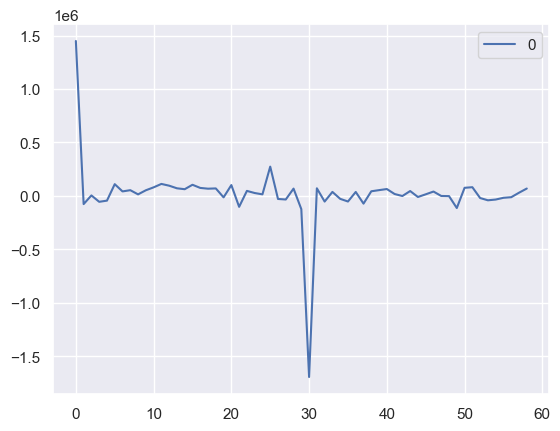

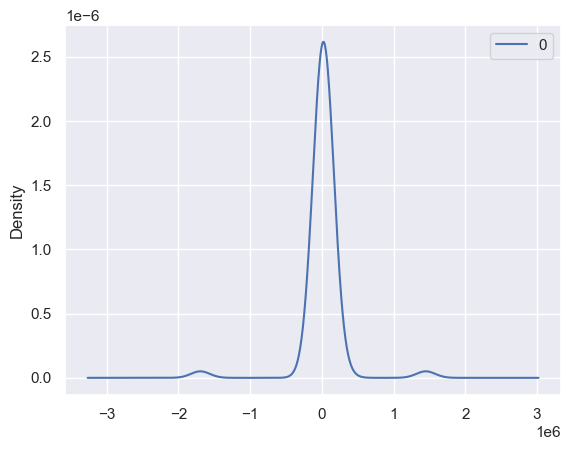

In [46]:
arima_model(data, 5, 1, 2)

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

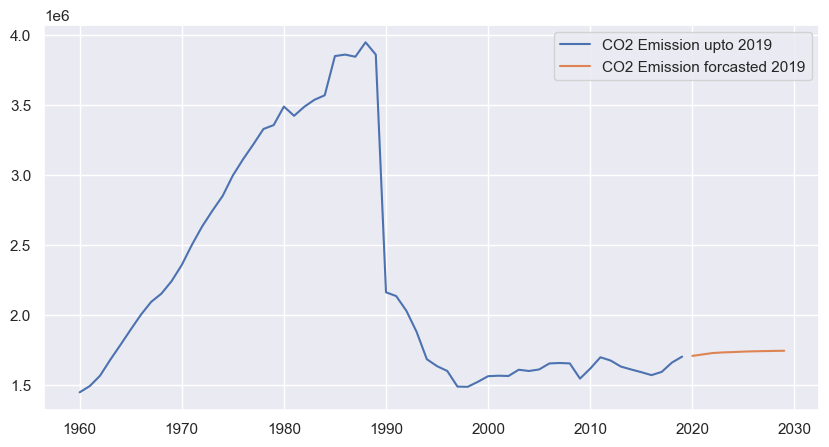

In [47]:
forecast(data, 5, 1, 2, 10)